# Wasserstein Singular Vectors on MNIST

This notebook showcases the Wasserstein singular vectors on a small subset of the MNIST dataset.

## Imports

In [29]:
!pip install pot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ot
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.manifold import MDS

## Functions to compute distances

In [15]:
# Compute OT distance matrix, with TV regularization
def distance_matrix(A, C, tau=0):
    D = np.zeros((A.shape[1], A.shape[1]))
    for i in range(A.shape[1]):
        D[i, :i] = D[:i, i] = ot.emd2(np.ascontiguousarray(A[:,i]), A[:,:i], C) + tau*C.max()*abs(A[:,[i]] - A[:,:i]).sum(0)
    return D

In [16]:
# Distance of two bins on the 1-D torus
def torus_distance(i, j, n):
    d1 = abs(j - i)
    d2 = n - d1
    return min(d1, d2)

In [17]:
# Generate random distance-like matrix
def random_distance(n, seed=None):
    np.random.seed(seed)
    D = np.random.rand(n, n)
    D += D.T
    np.fill_diagonal(D, 0)
    return D/D.max()

In [18]:
# Hilbert metric between two matrices
def hilbert(D1, D2):
    idx = (np.eye(D1.shape[0]) != 1) # exclude diagonal
    div = np.log(D1[idx]/D2[idx])
    return div.max() - div.min()

## Load data

In [19]:
# Load dataset
mnist = pd.read_csv('sample_data/mnist_train_small.csv')

In [20]:
# Subset dataset
n_images = mnist.shape[0]//70
A = np.array(mnist.T, dtype=float)[1:,:n_images]
labels = mnist['6'][:n_images]

In [21]:
# Keep only 0s and 1s
idx = np.array(labels <= 1)
labels = np.array(labels)[idx]
A = A[:,idx]

In [22]:
# Sort by label
idx = np.argsort(labels)
labels = labels[idx]
A = A[:,idx]

In [23]:
# Shape
m, n = A.shape[0], A.shape[1]
print(m, n)

784 55


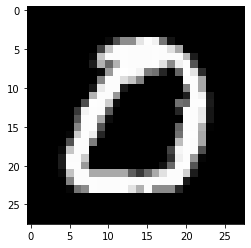

In [24]:
# Display
plt.imshow(A[:,0].reshape((28, 28)), cmap='gray');

In [25]:
# Normalization
A += 1e-6
B = A.T
A = A/A.sum(0)
B = B/B.sum(0)

## Compute leading eigenvector

In [26]:
# Generate random ground cost and distance
C = random_distance(m, seed=42)
D = random_distance(n, seed=24)

n_iter =  10
for k in range(n_iter):
  print('Computing D, iteration', k + 1)
  D = distance_matrix(A, C)
  D /= D.max()
  
  print('Computing C, iteration', k + 1)
  C = distance_matrix(B, D)
  C /= C.max()

Computing D, iteration 1
Computing C, iteration 1
Computing D, iteration 2
Computing C, iteration 2
Computing D, iteration 3
Computing C, iteration 3
Computing D, iteration 4
Computing C, iteration 4
Computing D, iteration 5
Computing C, iteration 5
Computing D, iteration 6
Computing C, iteration 6
Computing D, iteration 7
Computing C, iteration 7
Computing D, iteration 8
Computing C, iteration 8
Computing D, iteration 9
Computing C, iteration 9
Computing D, iteration 10
Computing C, iteration 10


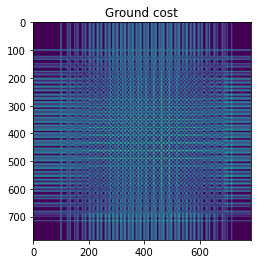

In [27]:
# Display ground cost
plt.title('Ground cost')
plt.imshow(C);

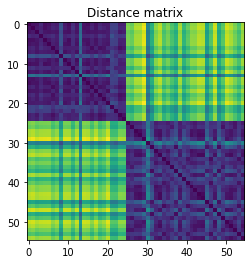

In [28]:
# Display distance matrix
plt.title('Distance matrix')
plt.imshow(D);

## Visualize distance matrix

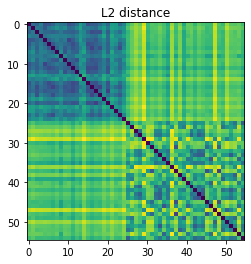

In [30]:
# Euclidean distance matrix
D2 = cdist(A.T, A.T)
plt.title('L2 distance')
plt.imshow(D2);

In [31]:
# For visualization
idx_0, idx_1 = (labels == 0), (labels == 1)

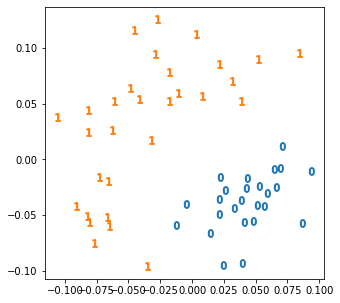

In [32]:
# MDS on euclidean distance matrix
embed = MDS(n_components=2, dissimilarity='precomputed').fit_transform(D2)
plt.figure(figsize=(5, 5))
plt.scatter(embed[idx_0, 0], embed[idx_0, 1], s=60, marker=r'$0$')
plt.scatter(embed[idx_1, 0], embed[idx_1, 1], s=60, marker=r'$1$');

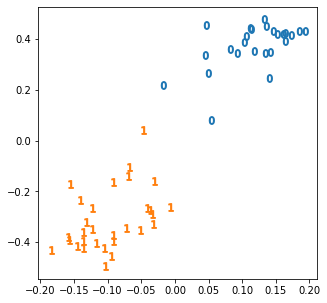

In [33]:
# MDS on our distance matrix
embed = MDS(n_components=2, dissimilarity='precomputed').fit_transform(D)
plt.figure(figsize=(5, 5))
plt.scatter(embed[idx_0, 0], embed[idx_0, 1], s=60, marker=r'$0$')
plt.scatter(embed[idx_1, 0], embed[idx_1, 1], s=60, marker=r'$1$');

## Visualize ground cost

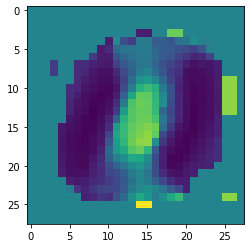

In [34]:
# 0-specific pixels
i, j = 13, 8
CC = C[28*i + j].reshape(28, 28)
plt.imshow(CC);

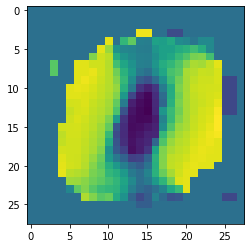

In [35]:
# 1-specific pixels
i, j = 13, 15
CC = C[28*i + j].reshape(28, 28)
plt.imshow(CC);

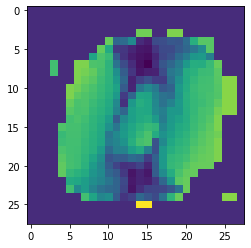

In [36]:
# shared pixels
i, j = 7, 15
CC = C[28*i + j].reshape(28, 28)
plt.imshow(CC);